# preparing data for machine learning - pluralsight
* Need for data prep
    * ML overview: clssification, regression, clustering, dimensionality reduction; 
        * if input data is poor - output will be poor (training data and prediction data)
    * insufficient data
        * issues: underfitting: the model learns the pattern in the small training set; underfitting: the model is overly simplistic
        * solutions
            * build a simpler model with fewer parameters
                * less suceptible to overfitting and learning patterns
                * e.g. Naive Bayes, logistic regression
                * ensemble techniques
            * transfer learning - use a pre-built model that solves a similar problem
                * only common use-cases
                * retrain the model on your dataset
            * data augmentation - try to increase the amount of data (images)
                * change pre-existing samples
                * images - scaling rotation, affine transformations
                * used to make CNNs more robust
            * synthetic data
                * gnerate samples that mimic real data
                * oversampling
                * might introduce bias
    * excessive or overly complex data (curse of dimensionality)
        * too many columns - curse of dimensionality (use irrelevent features)
            * re-orient data along new axis (dimesnionality reduction)
            * feature selection
            * aggregate data (feature engineering)
            * concept hierarchy
                * bucketing data
                * or group ing into more representative categories (e.g. swa long/lat for zip code)
        * outdated (historical) data - too many rows
            * concept drift - relationship x~y changes over time
            * be careful with historical data - especially with financial trading
            * human expert to determine what to leave out
    * no representative data, missing and outliers
        * feeding wrong data into model
        * errors in data
        * data cleaining and processing time
        * biased data -> biased models
            * mitigate by oversampling
        * cleaning data to cope with missing data an outliers
            * (listwise) delete - delete entire record if 1+ feaeture missing - could cause bias
                * reduces sample size
                * if missing ar not random - can introduce bias
            * immpute - inferred from existing data - 
                * use column average, median or mode
                * interpolate from nearby values (if records have inherent order)
                * ML model to impute
                    * univariate - rely on known values of same feature
                        * mean substitution - use the average of the column - weakense correlations (bivariate analysis impact) 
                    * multivariate - use other columns to predict missing
                        * regression - strengthens correlations
                * hot deck impute -sort based on any criteria, use immediately prior value for missing - 'last obs carried forward' - time-series data
            * outliers
                * identify
                    * distance from mean (headline) - variation is also important (range: max-min - swayed by outliers) - variance - stddev (sqrt of variance)
                        * pts > 3# stddev from mean = outlier (varies based on use case)
                    * distance from fitted line (regression) - don't fit with other data
                * cope with outliers - scrutinize outliers
                    * drop - if due to errors
                    * cap/floor
                        * standardize data first - subtract mean to get stddev for all values - cap within 3 stddevs
                    * set to mean - if only 1 feature is bad
                    * leav outlier if legitimate
        * duplicates - remove them if possible;
    * oversampling and undersampling - infer population characteristics from sample (representative subset)
        * unbiased samples are hard - if example cases are rare
        * add bias to make model more balanced - oversample uncommon values - undersample common values - to make classes even
        * reduces accuracy - increases precision and recall
        * case studies - in-depth analysis of rare cases using human judgement
        * startified sampling - divide data by category and include same # samples from each
    * overfitting (great train poor test) and underfitting
        * balance accuracy on train against complexity
        * don't memorize the train data 
        * not enought data -> underfitting - poor training scores
* data cleaning and transformation
* coninuous vs categorical data
* feature selection




In [1]:
import sklearn
import pandas as pd
import numpy as np
import datetime

In [2]:
automobile_df = pd.read_csv('datasets/cars.csv')
automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [3]:
#question marks are missing
automobile_df.shape

(394, 12)

In [4]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [5]:
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [6]:
# replace mpg blanks with mean of col
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())
automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [7]:
automobile_df = automobile_df.dropna()

In [8]:
automobile_df.shape

(387, 12)

In [9]:
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [10]:
automobile_df.drop(['Model'], axis=1, inplace=True) #drop irrelevant column

In [11]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
314,19.1,6,225,90,3381,18.7,1980,US,3.03,3.11,9.6
118,20.0,4,114,91,2582,14,1973,Europe,2.97,3.23,9.4
168,23.0,4,140,78,2592,18.5,1975,US,3.62,3.50,9.3
357,25.4,6,168,116,2900,12.6,1981,Japan,3.39,3.39,8.6
348,29.9,4,98,65,2380,20.7,1981,US,3.03,3.15,9


In [12]:
automobile_df.drop(['bore','stroke','compression-ratio'], inplace=True, axis=1)
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [13]:
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [14]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric()==False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [15]:
#regex to extract first 4 charactyers
extr = automobile_df['Year'].str.extract(r'^(\d{4})',expand=False)
extr.head(10)

0     1970
3     1970
4     1970
6     1970
7     1970
8     1970
9     1970
10    1970
11    1970
12    1970
Name: Year, dtype: object

In [16]:
automobile_df['Year'].isnull().any()

False

In [17]:
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [18]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [19]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']
automobile_df.drop(['Year'], axis=1, inplace=True)
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
208,19.0,6,156,108,2930,15.5,Japan,44
213,13.0,8,318,150,3755,14,US,44
384,26.0,4,156,92,2585,14.5,US,38
25,10.0,8,360,215,4615,14,US,50
375,36.0,4,98,70,2125,17.3,US,38


In [20]:
automobile_df.dtypes
#look for number columns labeled as object - these are mostlikely contain strings

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [21]:
automobile_df['Cylinders'].isnull().values.any()

False

In [22]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [23]:
automobile_df[automobile_df['Cylinders'].str.isnumeric()==False]['Cylinders']

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [24]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders']!='-']
cmean = cylinders.astype(int).mean()
                                                        

In [25]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [26]:
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [27]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [28]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [29]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [30]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [32]:
automobile_df['Origin'].unique()#US Europe or Japan

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [33]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'),
                                  'US',
                                  automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [34]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'),
                                  'Japan',
                                  automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [35]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'),
                                  'Europe',
                                  automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [36]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,43.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,41.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,44.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [37]:
automobile_df.to_csv('datasets/cars_processed.csv', index=False)

In [38]:
!dir datasets

 Volume in drive D has no label.
 Volume Serial Number is 4844-52A5

 Directory of D:\Users\Rob\Documents\python\data_cleaning_PS\datasets

11/12/2020  06:54 PM    <DIR>          .
11/12/2020  06:54 PM    <DIR>          ..
11/12/2020  06:54 PM            18,131 auto-mpg.csv
11/12/2020  06:54 PM            13,441 auto_mpg_processed.csv
11/12/2020  06:54 PM            25,336 cars.csv
11/16/2020  08:46 PM            13,530 cars_processed.csv
11/12/2020  06:54 PM            23,873 diabetes.csv
11/15/2020  03:51 PM            40,699 diabetes_processed.csv
11/15/2020  03:37 PM            32,381 diabetes_processed_incomplete.csv
11/12/2020  06:54 PM         1,616,446 GoSales_Tx_LogisticRegression.csv
               8 File(s)      1,783,837 bytes
               2 Dir(s)  1,572,576,051,200 bytes free


# visualize

In [39]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MPG')

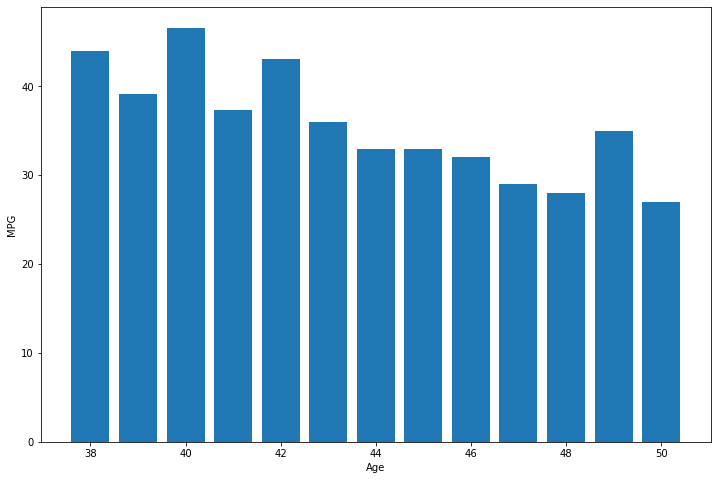

In [40]:
plt.figure(figsize=(12,8))
plt.bar(automobile_df['Age'], automobile_df['MPG'])
plt.xlabel('Age')
plt.ylabel('MPG')

Text(0, 0.5, 'MPG')

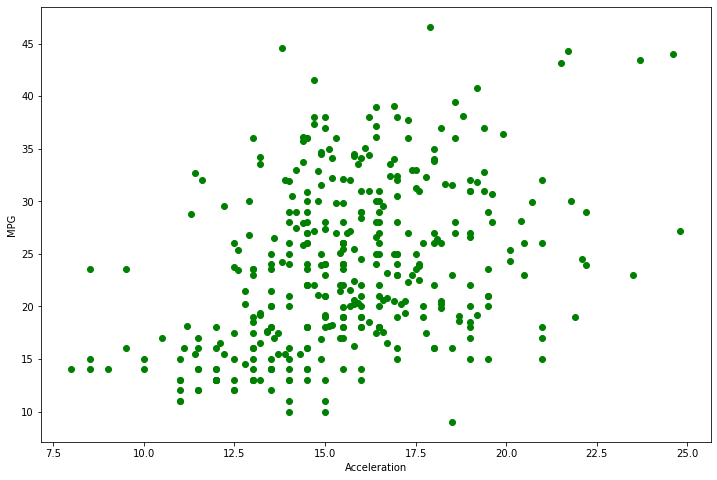

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')
plt.xlabel('Acceleration')
plt.ylabel('MPG')

Text(0, 0.5, 'MPG')

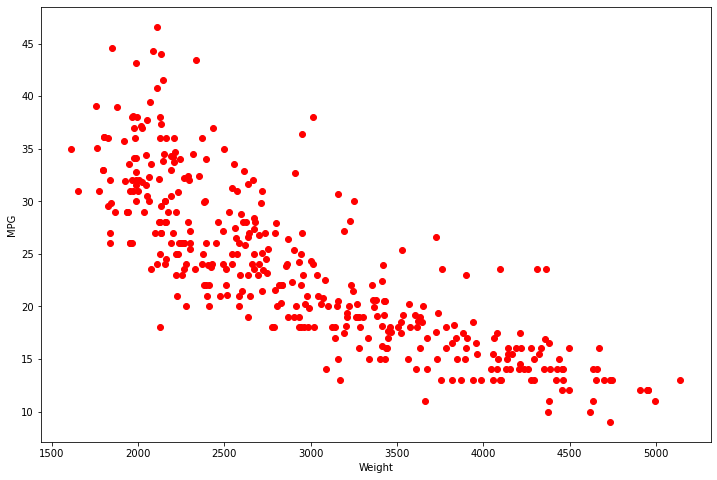

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')
plt.xlabel('Weight')
plt.ylabel('MPG')

<AxesSubplot:xlabel='Weight', ylabel='Acceleration'>

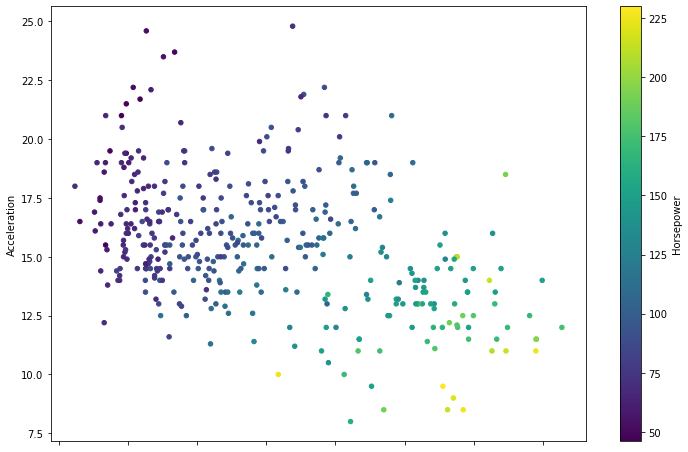

In [43]:
automobile_df.plot.scatter('Weight', 'Acceleration', c='Horsepower',
                           colormap='viridis', figsize=(12,8))

Text(0, 0.5, 'MPG')

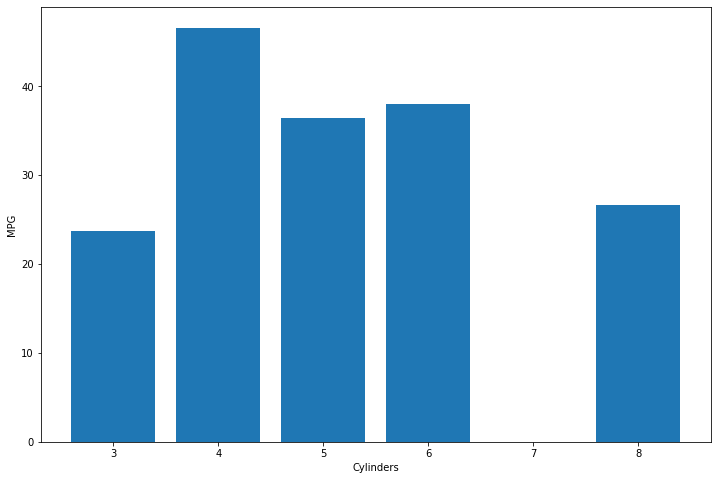

In [44]:
plt.figure(figsize=(12,8))
plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')

In [45]:
automobile_df.drop(['Cylinders', 'Origin'], axis=1, inplace=True)
automobile_df.sample(5)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
102,11.0,400.0,150,4997,14.0,47
251,20.5,200.0,95,3155,18.2,42
317,31.3,120.0,75,2542,17.5,40
312,26.4,140.0,88,2870,18.1,40
75,18.0,121.0,112,2933,14.5,48


In [46]:
cars_corr = automobile_df.corr()
cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


<AxesSubplot:>

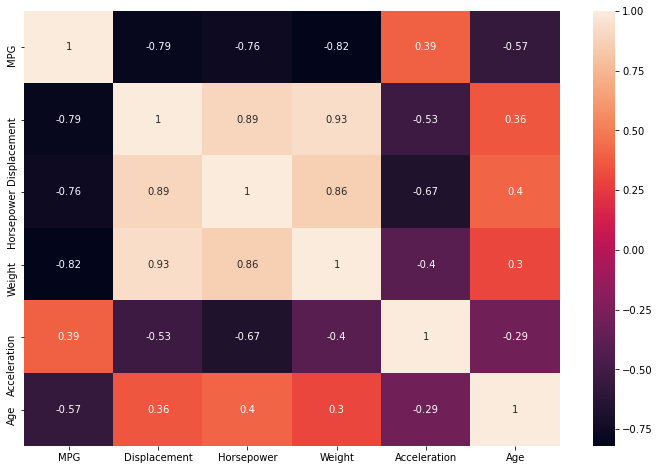

In [47]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(cars_corr, annot=True)

# regression

In [48]:
automobile_df = pd.read_csv("datasets/cars_processed.csv")
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,50
1,16.000000,8,304.0,150,3433,12.0,US,50
2,17.000000,8,302.0,140,3449,10.5,US,50
3,14.000000,8,454.0,220,4354,9.0,US,50
4,23.551429,8,440.0,215,4312,8.5,US,50


In [49]:
automobile_df.shape

(387, 8)

In [50]:
X = automobile_df[['Age']]
Y = automobile_df['MPG']

<AxesSubplot:xlabel='Age', ylabel='MPG'>

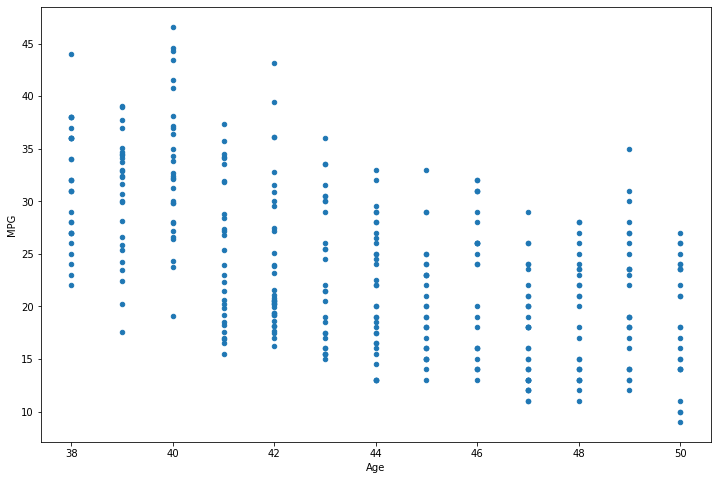

In [51]:
automobile_df.plot.scatter('Age', 'MPG', figsize=(12,8))

In [52]:
from sklearn.model_selection import train_test_split#split and shuffle
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

In [53]:
from sklearn.linear_model import LinearRegression
#normalize = subract me and divide by l2 norm
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [54]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.3231510424848373


In [55]:
y_pred = linear_model.predict(x_test)

In [56]:
from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.29565324287486794


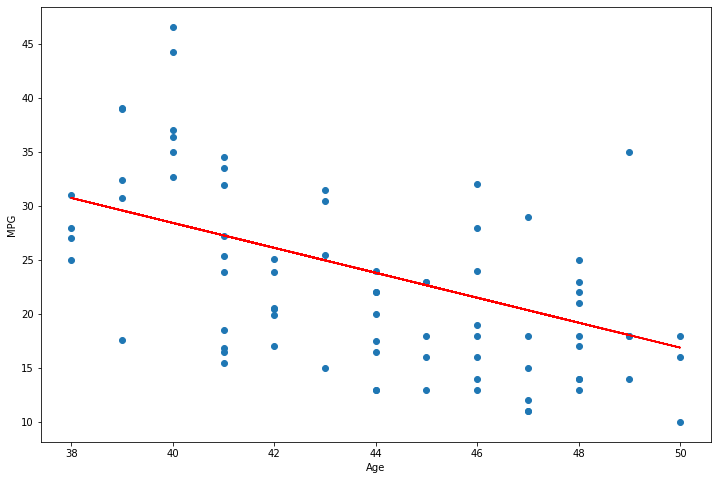

In [57]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')
plt.xlabel('Age')
plt.ylabel('MPG')
plt.show()

In [58]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.58396062861707
Testing score:  0.5454436467819694


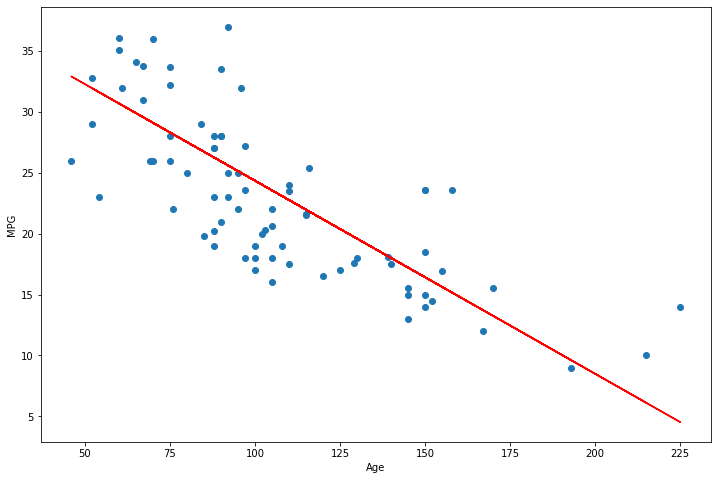

In [59]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')
plt.xlabel('Age')
plt.ylabel('MPG')
plt.show()

In [60]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,50
1,16.000000,8,304.0,150,3433,12.0,US,50
2,17.000000,8,302.0,140,3449,10.5,US,50
3,14.000000,8,454.0,220,4354,9.0,US,50
4,23.551429,8,440.0,215,4312,8.5,US,50


## multiple regression

In [61]:
automobile_df = pd.get_dummies(automobile_df, columns=['Origin'])#one-hot
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age,Origin_Europe,Origin_Japan,Origin_US
0,18.000000,8,307.0,130,3504,12.0,50,0,0,1
1,16.000000,8,304.0,150,3433,12.0,50,0,0,1
2,17.000000,8,302.0,140,3449,10.5,50,0,0,1
3,14.000000,8,454.0,220,4354,9.0,50,0,0,1
4,23.551429,8,440.0,215,4312,8.5,50,0,0,1


In [62]:
X = automobile_df.drop('MPG', axis=1)
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.8096112588684921
Testing score:  0.774521983642396


# univariate impute

In [63]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [64]:
diabetes.shape

(768, 9)

In [65]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
diabetes.describe().transpose()
#min 0 is a red flag for certain values: missing=0?

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [67]:
diabetes['Glucose'].replace(0, np.nan, inplace=True)
diabetes['BloodPressure'].replace(0, np.nan, inplace=True)
diabetes['SkinThickness'].replace(0, np.nan, inplace=True)
diabetes['Insulin'].replace(0, np.nan, inplace=True)
diabetes['BMI'].replace(0, np.nan, inplace=True)

In [68]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [69]:
arr = diabetes['SkinThickness'].values.reshape(-1,1)
arr.shape

(768, 1)

In [70]:
from sklearn.impute import SimpleImputer #basic inferences strategies

In [71]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(diabetes['SkinThickness'].values.reshape(-1,1))
diabetes['SkinThickness'] = imp.transform(diabetes['SkinThickness'].values.reshape(-1,1))

In [72]:
diabetes['SkinThickness'].describe()
#statistical properties of data have changed - mean stddev

count    768.000000
mean      29.994792
std        8.886506
min        7.000000
25%       25.000000
50%       32.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [73]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [74]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(diabetes['Glucose'].values.reshape(-1,1))
diabetes['Glucose'] = imp.transform(diabetes['Glucose'].values.reshape(-1,1))

In [76]:
diabetes['Glucose'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [77]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [78]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(diabetes['BloodPressure'].values.reshape(-1,1))
diabetes['BloodPressure'] = imp.transform(diabetes['BloodPressure'].values.reshape(-1,1))

In [79]:
diabetes['BloodPressure'].describe()# stddev changed

count    768.000000
mean      72.405184
std       12.096346
min       24.000000
25%       64.000000
50%       72.202592
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [80]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=32)
imp.fit(diabetes['BMI'].values.reshape(-1,1))
diabetes['BMI'] = imp.transform(diabetes['BMI'].values.reshape(-1,1))

In [81]:
diabetes['BMI'].describe()# stddev changed

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [82]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [83]:
diabetes.to_csv('datasets/diabetes_processed_incomplete.csv', index=False)
!dir datasets

 Volume in drive D has no label.
 Volume Serial Number is 4844-52A5

 Directory of D:\Users\Rob\Documents\python\data_cleaning_PS\datasets

11/12/2020  06:54 PM    <DIR>          .
11/12/2020  06:54 PM    <DIR>          ..
11/12/2020  06:54 PM            18,131 auto-mpg.csv
11/12/2020  06:54 PM            13,441 auto_mpg_processed.csv
11/12/2020  06:54 PM            25,336 cars.csv
11/16/2020  08:46 PM            13,530 cars_processed.csv
11/12/2020  06:54 PM            23,873 diabetes.csv
11/15/2020  03:51 PM            40,699 diabetes_processed.csv
11/16/2020  08:47 PM            32,381 diabetes_processed_incomplete.csv
11/12/2020  06:54 PM         1,616,446 GoSales_Tx_LogisticRegression.csv
               8 File(s)      1,783,837 bytes
               2 Dir(s)  1,572,576,051,200 bytes free


## multivariate imputation
using other columns

In [84]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#fits a regression model with target of the col with missing volume

In [85]:
imp = IterativeImputer(max_iter=100, random_state=0)

In [86]:
features = [[4,2,1],
           [24,12,6],
           [8,np.nan,2],
           [28,14,7],
           [32,16,np.nan],
           [600,300,150],
           [np.nan, 60,30],
           [np.nan, np.nan,1]]

In [87]:
imp.fit(features)

IterativeImputer(max_iter=100, random_state=0)

In [88]:
imp.transform(features)

array([[  4.        ,   2.        ,   1.        ],
       [ 24.        ,  12.        ,   6.        ],
       [  8.        ,   3.99966   ,   2.        ],
       [ 28.        ,  14.        ,   7.        ],
       [ 32.        ,  16.        ,   7.92735309],
       [600.        , 300.        , 150.        ],
       [120.00314828,  60.        ,  30.        ],
       [  5.58961599,   2.79614865,   1.        ]])

In [89]:
X_test = [[np.nan,24,12],
         [36,np.nan,np.nan],
         [100,np.nan,25],
         [np.nan,6,3],
         [np.nan,8,np.nan]]

In [90]:
imp.transform(X_test)

array([[ 48.00364637,  24.        ,  12.        ],
       [ 36.        ,  17.99997416,   8.92708811],
       [100.        ,  49.99967879,  25.        ],
       [ 12.00389541,   6.        ,   3.        ],
       [ 16.12053713,   8.        ,   5.86176341]])

In [91]:
diabetes = pd.read_csv('datasets/diabetes_processed_incomplete.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.000000,32.0,NaN,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,32.0,NaN,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,32.0,NaN,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,32.0,NaN,32.0,0.232,54,1


In [92]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [93]:
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes[['Outcome']]
diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,32.0,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [94]:
imp = IterativeImputer(max_iter=10000, random_state=0)

In [95]:
imp.fit(diabetes_features)

IterativeImputer(max_iter=10000, random_state=0)

In [96]:
diabetes_features_arr = imp.transform(diabetes_features)

In [97]:
diabetes_features_arr.shape

(768, 8)

In [98]:
diabetes_features = pd.DataFrame(diabetes_features_arr, columns=diabetes_features.columns)
diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [99]:
diabetes = pd.concat([diabetes_features, diabetes_label], axis=1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [100]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
diabetes.to_csv('datasets/diabetes_processed.csv', index=False)
!dir datasets

 Volume in drive D has no label.
 Volume Serial Number is 4844-52A5

 Directory of D:\Users\Rob\Documents\python\data_cleaning_PS\datasets

11/12/2020  06:54 PM    <DIR>          .
11/12/2020  06:54 PM    <DIR>          ..
11/12/2020  06:54 PM            18,131 auto-mpg.csv
11/12/2020  06:54 PM            13,441 auto_mpg_processed.csv
11/12/2020  06:54 PM            25,336 cars.csv
11/16/2020  08:46 PM            13,530 cars_processed.csv
11/12/2020  06:54 PM            23,873 diabetes.csv
11/16/2020  08:47 PM            40,699 diabetes_processed.csv
11/16/2020  08:47 PM            32,381 diabetes_processed_incomplete.csv
11/12/2020  06:54 PM         1,616,446 GoSales_Tx_LogisticRegression.csv
               8 File(s)      1,783,837 bytes
               2 Dir(s)  1,572,576,051,200 bytes free


## flag imputed values that were missing

In [102]:
from sklearn.impute import MissingIndicator

In [103]:
features = [[4,2,1],
           [24,12,6],
           [8,4,2],
           [28,14,7],
           [32,16,-1],
           [600,300,150],
           [-1, 60,30],
           [-1,4,1]] #missing values are -1 instead of nan

In [104]:
indicator = MissingIndicator(missing_values=-1)

In [105]:
mask_missing_values_only = indicator.fit_transform(features)
mask_missing_values_only #only columns that had missing values are represented in the array

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True, False],
       [ True, False]])

In [106]:
indicator.features_ #column indexes that had missing vals

array([0, 2], dtype=int64)

In [107]:
indicator = MissingIndicator(missing_values=-1, features='all')

In [108]:
mask_all = indicator.fit_transform(features)
mask_all #don't omit columns that don't have missing

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False],
       [ True, False, False],
       [ True, False, False]])

In [109]:
indicator.features_

array([0, 1, 2])

## feature imputation pipeline

In [110]:
diabetes = pd.read_csv('datasets/diabetes_processed.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


artificially introdcuing missing valuees

In [111]:
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes[['Outcome']]
diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [112]:
mask = np.random.randint(0,100, size=diabetes_features.shape).astype(np.bool)
#np.bool = nonzero=true and 0=False
mask=np.logical_not(mask)#invert #roughly 1 in 100 will be true

In [113]:
diabetes_features[mask] = np.nan
diabetes_features.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9.0,89.0,62.000000,32.0,70.675769,22.5,0.142,33.0
105,1.0,126.0,56.000000,NaN,152.000000,28.7,0.801,21.0
52,5.0,88.0,66.000000,21.0,23.000000,24.4,0.342,30.0
136,0.0,100.0,70.000000,26.0,50.000000,30.8,0.597,21.0
29,5.0,117.0,92.000000,32.0,137.554255,34.1,0.337,38.0
0,6.0,NaN,72.000000,35.0,219.028414,33.6,0.627,50.0
369,1.0,133.0,102.000000,28.0,140.000000,32.8,0.234,45.0
169,NaN,111.0,90.000000,12.0,78.000000,28.4,0.495,29.0
728,2.0,175.0,88.000000,32.0,240.016014,22.9,0.326,22.0
477,7.0,114.0,76.000000,17.0,110.000000,23.8,0.466,31.0


In [114]:
diabetes_features.isnull().sum()

Pregnancies                  7
Glucose                      8
BloodPressure                6
SkinThickness               11
Insulin                      4
BMI                          7
DiabetesPedigreeFunction     7
Age                         10
dtype: int64

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

In [116]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_features, diabetes_label, test_size=.2)

In [117]:
#replace every missing value for the mean value of that feature
transformer = ColumnTransformer(
    transformers=[('features', SimpleImputer(strategy='mean'),[0,1,2,3,4,5,6,7])]
)#list of vals is the columns to apply the transformation
#specify a sequence of transformations

In [118]:
clf = make_pipeline(transformer, DecisionTreeClassifier(max_depth=4))

In [119]:
clf = clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.8061889250814332

In [120]:
y_pred = clf.predict(x_test)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7857142857142857